In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_931.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_586.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_952.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_52.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_335.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_67.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_42.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_147.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_328.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_789.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_623.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_206.png
/kaggle/input/expresion-facial/dataset/test_set/Surprise/Surprise_514.png
/kaggle/input/expresion-facial/dataset/te

**IMPORTING LIBRARIES**

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2

**DIFFERENT TYPES OF EXPRESSIONS**

**ANGER**

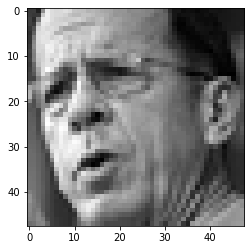

In [3]:
plt.imshow(cv2.imread("/kaggle/input/expresion-facial/dataset/training_set/Anger/Anger_2518.png"))

**NEUTRAL**

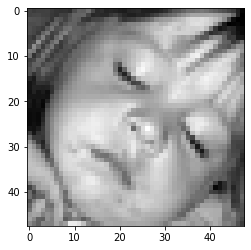

In [4]:
plt.imshow(cv2.imread("/kaggle/input/expresion-facial/dataset/training_set/Neutral/Neutral_2021.png"))

**SURPRISED**

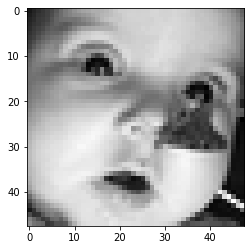

In [5]:
plt.imshow(cv2.imread("/kaggle/input/expresion-facial/dataset/training_set/Surprise/Surprise_2618.png"))

**FEAR**

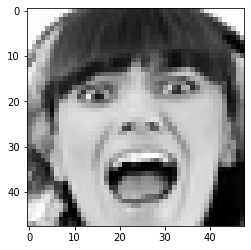

In [6]:
plt.imshow(cv2.imread("/kaggle/input/expresion-facial/dataset/training_set/Fear/Fear_1833.png"))

**HAPPY**

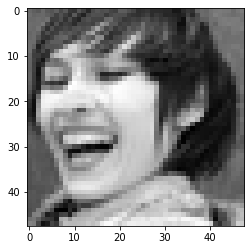

In [7]:
plt.imshow(cv2.imread("/kaggle/input/expresion-facial/dataset/training_set/Happy/Happy_2033.png"))

**SAD**

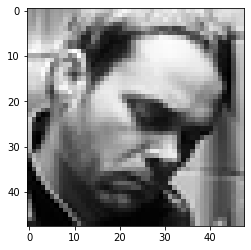

In [8]:
plt.imshow(cv2.imread("/kaggle/input/expresion-facial/dataset/training_set/Sad/Sad_2123.png"))

**RE-SCALING ALL THE IMAGES**

In [9]:
IMAGE_SIZE=[224,224]

**SETTIG TRAIN AND TEST PATH**

In [10]:
train_path = '/kaggle/input/expresion-facial/dataset/training_set'
valid_path = '/kaggle/input/expresion-facial/dataset/test_set'

**ADD PREPROCESSIN LAYER TO THE FRONT OF VGG**

In [11]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


**DON'T TRAIN EXISTING WEIGHTS**

In [12]:
for layer in vgg.layers:
  layer.trainable = False

**USEFUL FOR GETTING NUMBER OF CLASSES**

In [13]:
folders = glob('/kaggle/input/expresion-facial/dataset/training_set/*')

**OUR BUILT LAYERS**

In [14]:
x = Flatten()(vgg.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

**CREATING A MODEL OBJECT**

In [16]:
model = Model(inputs=vgg.input, outputs=prediction)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

From above Dense layer we see that we have 6 different classes to classify from.

**COMPILING THE MODEL**

In [18]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**PREPROCESSING THE TRAINING SET**

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/kaggle/input/expresion-facial/dataset/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18006 images belonging to 6 classes.


**PREPROCESSING THE TEST SET**

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('/kaggle/input/expresion-facial/dataset/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6006 images belonging to 6 classes.


**FITTING THE MODEL**

In [21]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
563/563 [==============================] - 278s 487ms/step - loss: 1.7318 - accuracy: 0.3554 - val_loss: 1.4901 - val_accuracy: 0.4492
Epoch 2/5
563/563 [==============================] - 199s 354ms/step - loss: 1.4135 - accuracy: 0.4666 - val_loss: 1.7214 - val_accuracy: 0.4549
Epoch 3/5
563/563 [==============================] - 196s 349ms/step - loss: 1.3786 - accuracy: 0.4912 - val_loss: 1.5182 - val_accuracy: 0.4426
Epoch 4/5
563/563 [==============================] - 195s 346ms/step - loss: 1.2804 - accuracy: 0.5272 - val_loss: 1.5207 - val_accuracy: 0.4677
Epoch 5/5
563/563 [==============================] - 202s 359ms/step - loss: 1.2461 - accuracy: 0.5315 - val_loss: 1.3640 - val_accuracy: 0.4978


**VISUALIZING THE LOSS**

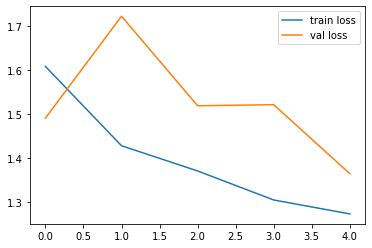

<Figure size 432x288 with 0 Axes>

In [22]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

**VISUALIZING THE ACCURACY**

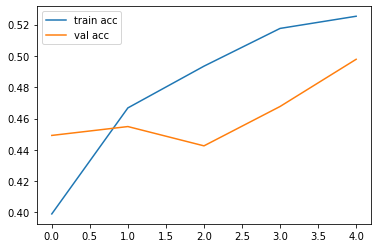

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')